# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表

,metric
回測K棒數量,5000
總報酬率,252.62
日報酬率,0.6069
最大回撤,-15.83
交易次數,193
勝率,43.52
平均每筆報酬率,7.56
平均獲利時報酬,41.25
平均虧損時報酬,-18.40
盈虧比,2.24


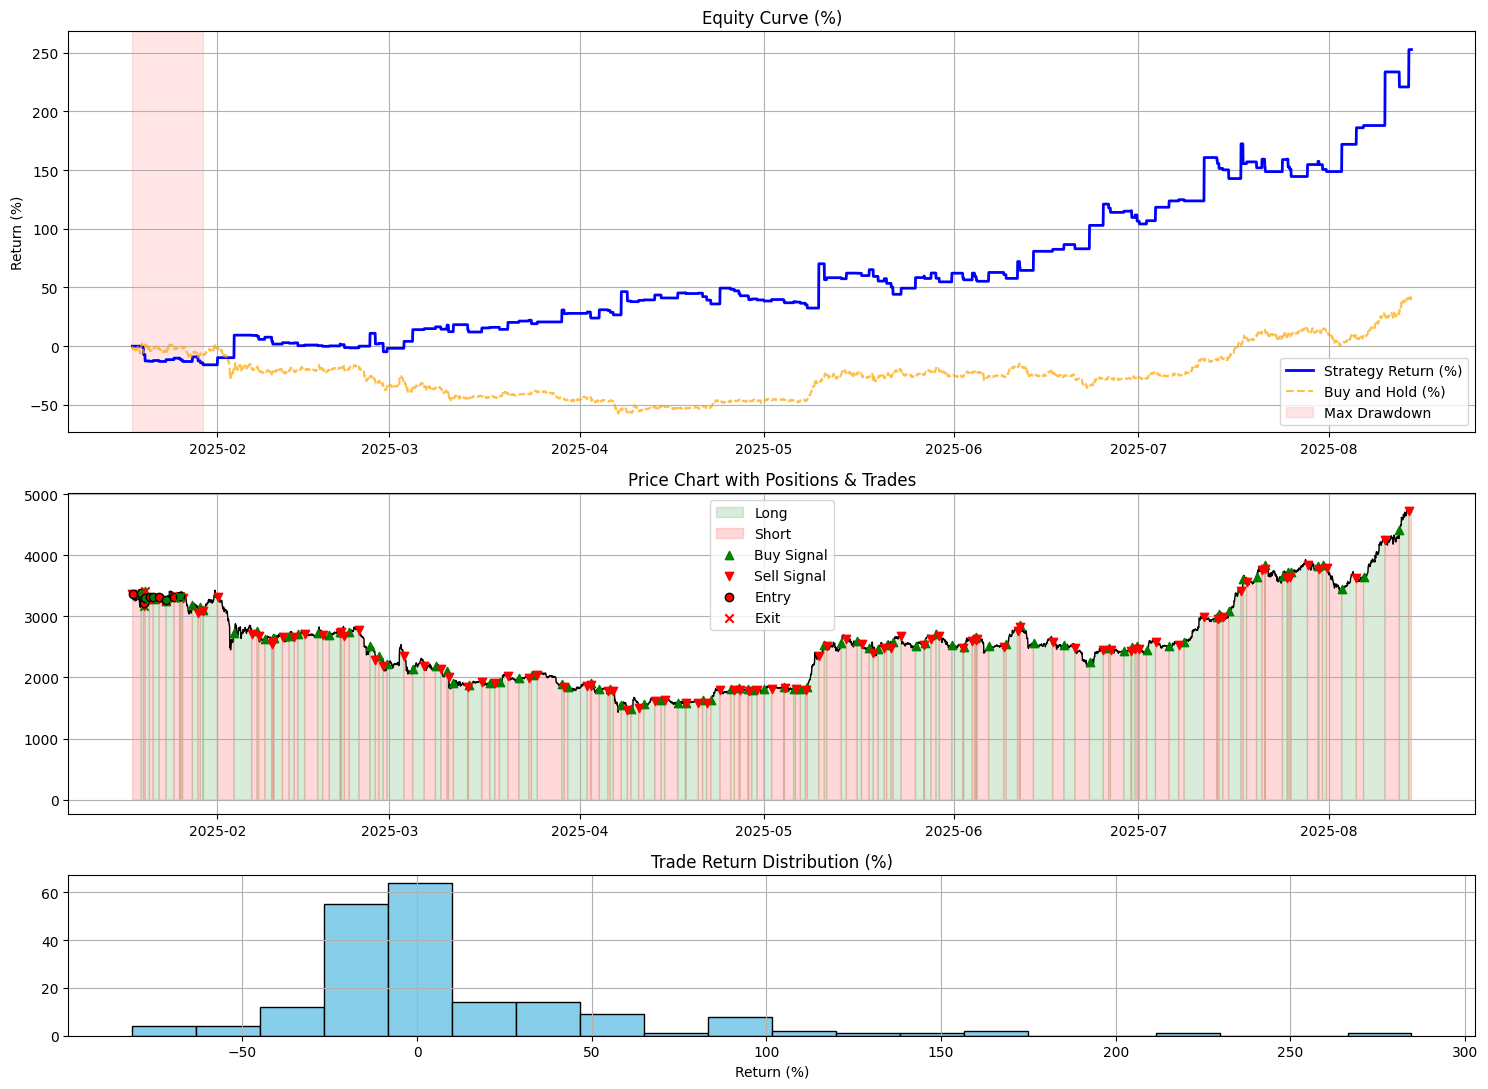

,timestamp,signal,close
4900,2025-08-10 08:00:00,0,4210.000000
4901,2025-08-10 09:00:00,0,4225.370000
4902,2025-08-10 10:00:00,0,4198.310000
4903,2025-08-10 11:00:00,0,4180.570000
4904,2025-08-10 12:00:00,0,4201.100000
4905,2025-08-10 13:00:00,0,4167.450000
4906,2025-08-10 14:00:00,0,4219.370000
4907,2025-08-10 15:00:00,0,4217.940000
4908,2025-08-10 16:00:00,0,4233.600000
4909,2025-08-10 17:00:00,0,4224.010000


In [3]:
from Technicalindicatorstrategy import vegas,turtle_strategy,SmoothedMACDStrategy
from Backtest.backtest import backtest_signals
from Plot.plot import plot_backtest_result
import pandas as pd
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(42)  # ✅ 固定隨機性（可重現性）
import random
random.seed(42)

df_signals = SmoothedMACDStrategy.get_signals('ETHUSDT','1h',datetime.now(),5000)

result = backtest_signals(
    df_signals.copy(),
    initial_capital = 33, # 1000台幣
    fee_rate = 0.0005, # 合約手續費
    leverage = 10, # 槓桿
    allow_short = True, # 是否做空
    stop_loss = None,       # 停損閾值，例如0.05代表5%
    take_profit = None,     # 停利閾值
    capital_ratio = 0.1, # 每次使用的資金佔比
    max_hold_bars = 100000,# 最大持有K棒數
    delay_entry=False
    )  
display(pd.DataFrame(result['metric'],index=['metric']).T)
plot_backtest_result(result)
display(df_signals[['timestamp','signal','close']].tail(100).style.background_gradient())

In [4]:
pd.DataFrame(result['trades_log']).tail(100).style.background_gradient()

,entry_time,exit_time,side,entry_price,exit_price,bars_held,return,reason
93,2025-04-25 15:00:00,2025-04-26 06:00:00,long,1809.353652,1793.552775,14,-0.087329,Signal Change
94,2025-04-26 05:00:00,2025-04-27 00:00:00,short,1790.395538,1821.780435,18,-0.172276,Signal Change
95,2025-04-26 23:00:00,2025-04-27 05:00:00,long,1817.770800,1797.300900,5,-0.112610,Signal Change
96,2025-04-27 04:00:00,2025-04-28 12:00:00,short,1808.596064,1817.108100,31,-0.046844,Signal Change
97,2025-04-28 11:00:00,2025-04-28 14:00:00,long,1816.638807,1783.317895,2,-0.183421,Signal Change
98,2025-04-28 13:00:00,2025-04-29 02:00:00,short,1805.074385,1797.408255,12,0.042651,Signal Change
99,2025-04-29 01:00:00,2025-04-29 23:00:00,long,1803.135307,1791.793655,21,-0.062900,Signal Change
100,2025-04-29 22:00:00,2025-05-01 02:00:00,short,1799.172278,1810.824960,27,-0.064350,Signal Change
101,2025-05-01 01:00:00,2025-05-02 08:00:00,long,1799.086553,1815.421835,30,0.090798,Signal Change
102,2025-05-02 07:00:00,2025-05-04 07:00:00,short,1830.425854,1846.422750,47,-0.086637,Signal Change
